EDA

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import tarfile
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,StandardScaler, Normalizer
#from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import SGDClassifier

In [45]:
# Load the dataset
df = pd.read_csv('../datasets/bank-additional-full.csv', sep=';')

# 1. Basic Information

In [46]:
# Basic information
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)

Shape of dataset: (41188, 21)

Data types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


# 2. Missing Values and Unique Summary

In [83]:
# Missing values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [84]:
# Any duplicates?
print(df.nunique())

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


# 3. Univariate Analysis (Numerical Features)

In [75]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


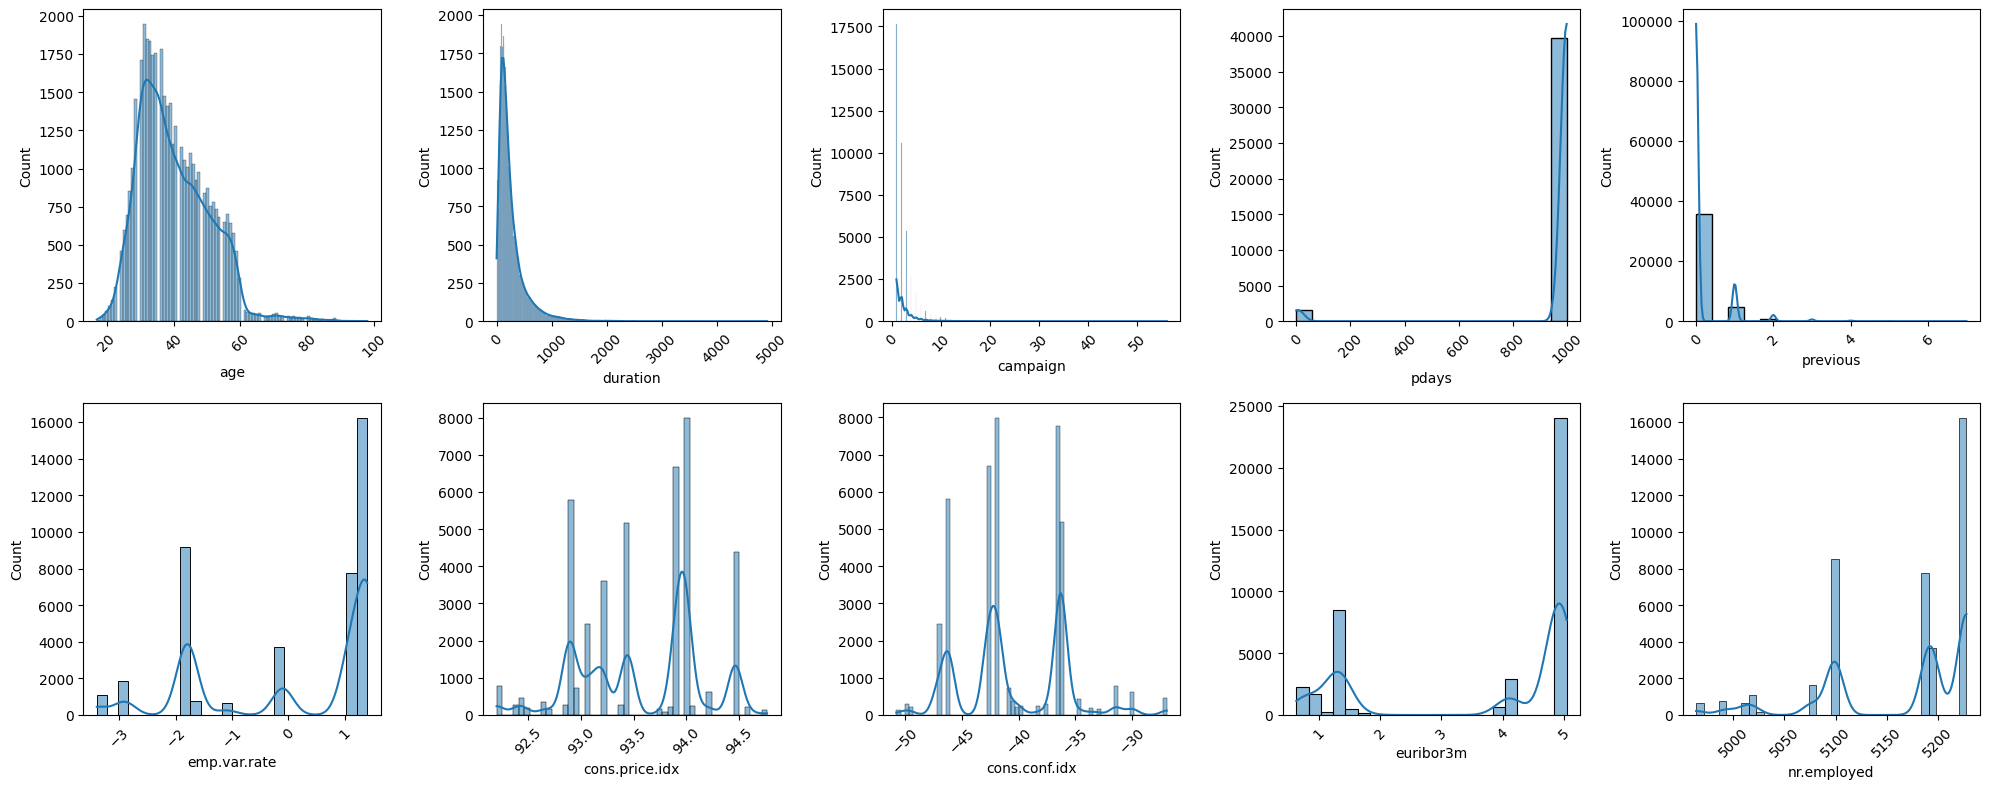

In [76]:
# Boxplot and histogram for a few important features
num_cols = df.select_dtypes(include='number').columns
n_cols = 5
n_rows = 2

fig, axes =plt.subplots(n_rows, n_cols, figsize=(20,8))
axes = axes.flatten()

for i, col in enumerate(num_cols[:n_cols * n_rows]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# 4. Univariate Analysis (Categorical Features)

In [77]:
# Summary statistics (categorical features)
print('\nSummary statistics (categorical):\n', df.describe(include='object'))


Summary statistics (categorical):
            job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548  


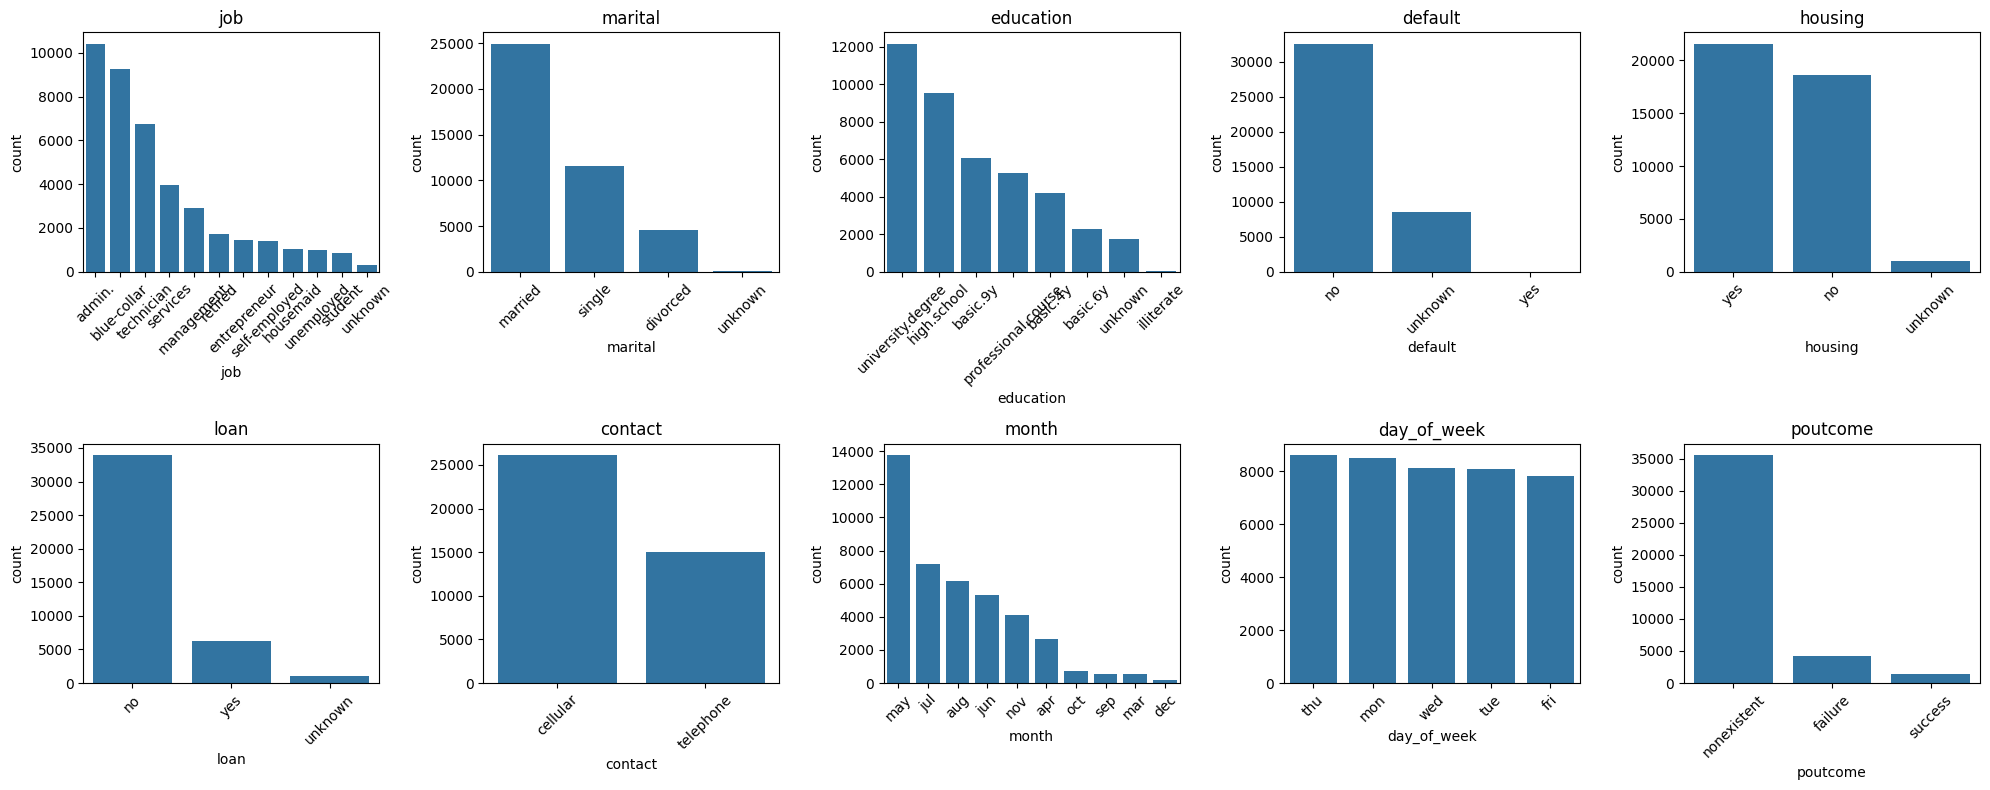

In [78]:
cat_cols = df.select_dtypes(include='object').columns.drop('y')
n_cols = 5
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5. Target Variable (y) Distribution

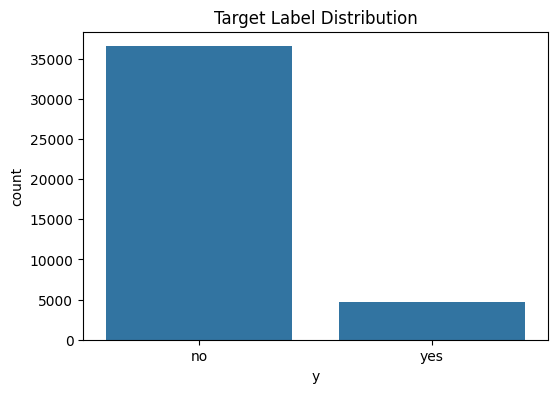

In [79]:
# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y')
plt.title('Target Label Distribution')
plt.show()

# 6. Correlation heatmap (only for numeric columns)

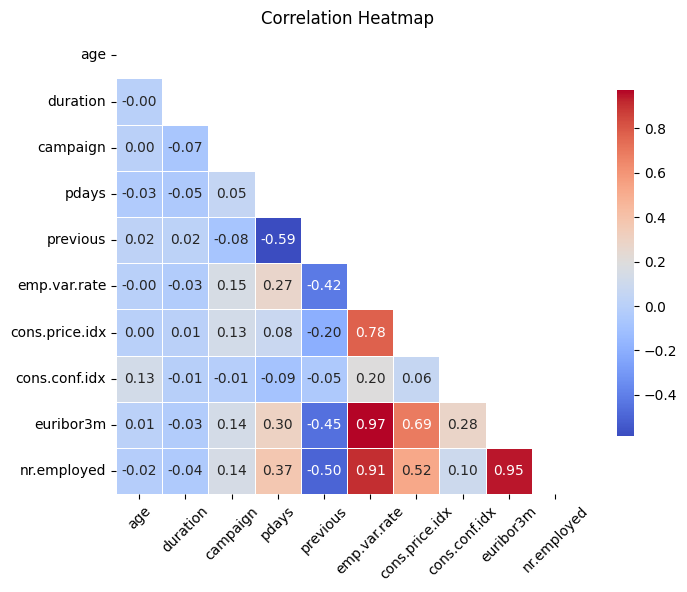

In [80]:
# Set matrix
corr = df.corr(numeric_only=True)
# Create a mask for the upper triangle plot
mask = np.triu(np.ones_like(corr, dtype=bool))

#set up the matplotlib figure
plt.figure(figsize=(10 ,6))

sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.xticks(rotation=45)
plt.title('Correlation Heatmap')
plt.show()

# 7. Correlatioin with Target label

In [81]:
# Encode target to numeric for correlation
df_temp = df.copy()
df_temp['y'] = df_temp['y'].map({'no': 0, 'yes': 1})
print(df_temp.corr(numeric_only=True)['y'].sort_values(ascending=False))

y                 1.000000
duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64


# 8. Bivariate Analysis: Categorical vs Target

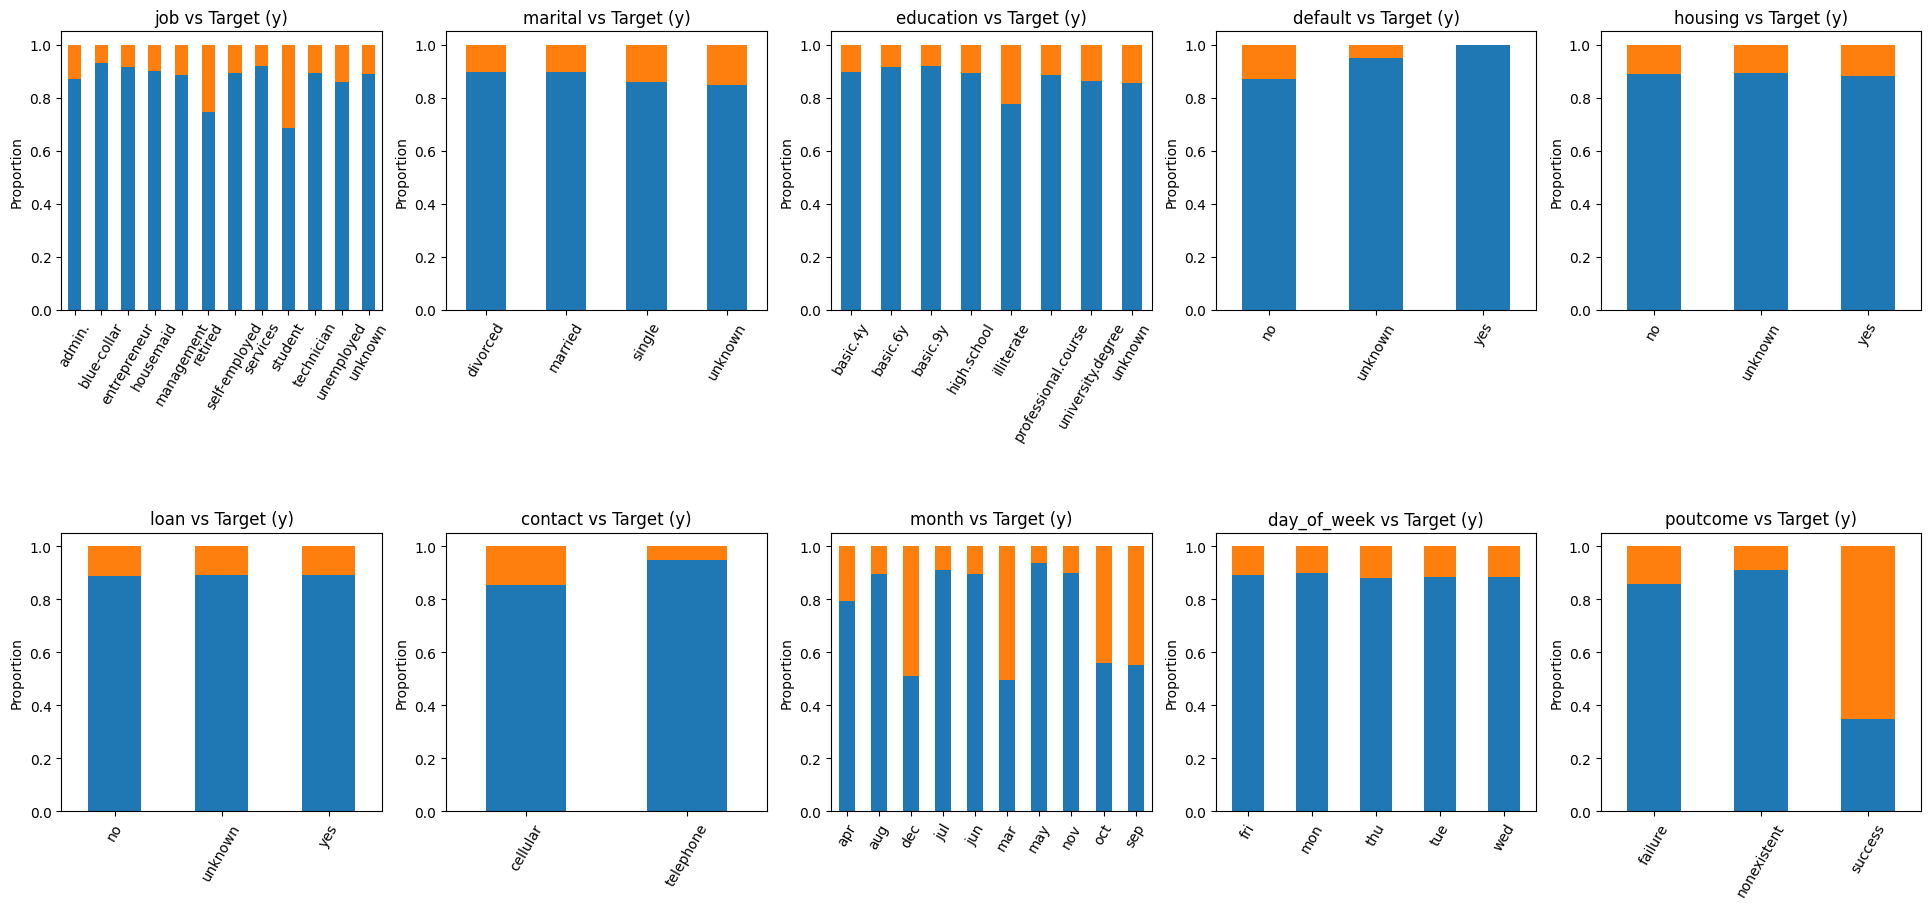

In [82]:
cat_cols = df.select_dtypes(include='object').columns.drop('y')
n_cols = 5
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 10))
axes = axes.flatten()


for i, col in enumerate(cat_cols[:n_cols * n_rows]):
    ct = pd.crosstab(df[col], df['y'], normalize='index')
    ct.plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    axes[i].set_title(f'{col} vs Target (y)', fontsize=12)
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=60)
    axes[i].set_xlabel('')
    
fig.subplots_adjust(hspace=0.8, bottom=0.1)

plt.show()

Let me know if you want me add anything else. 😀